<a href="https://colab.research.google.com/github/mahmoudta74/Pytorch_Tutorial/blob/master/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor

In [1]:
#import essential packages 
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision.transforms as transforms

In [6]:
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.version.cuda)

1.6.0+cu101
True
10.1


In [12]:
#create tensor
tensor0d = torch.tensor(5)
tensor1d = torch.tensor([1,2,7]).cuda()   # gpu tensor
tensor2d = torch.tensor([[1,2], [4,7]])
#...
print(tensor0d, '\n', tensor1d, '\n', tensor2d, '\n\n\n')

print(tensor2d.shape,'\n',tensor2d.size(), '\n\n\n')    # .size() need () but .shape dose'nt need  
print(tensor2d[0],'\n', tensor2d.shape[0],'\n', tensor2d.size(0), '\n\n\n')



print(tensor2d.dtype)
tensor2d = tensor2d.type(dtype= torch.int32)
print(tensor2d.dtype)
#cpu tensor
tensor2d = tensor2d.type(dtype= torch.FloatTensor)
print(tensor2d.dtype)

#gpu tensor
tensor2d = tensor2d.type(dtype= torch.cuda.FloatTensor)
print(tensor2d.dtype)

tensor(5) 
 tensor([1, 2, 7], device='cuda:0') 
 tensor([[1, 2],
        [4, 7]]) 



torch.Size([2, 2]) 
 torch.Size([2, 2]) 



tensor([1, 2]) 
 2 
 2 



torch.int64
torch.int32
torch.float32
torch.float32


In [ ]:
# special tensors
zeros2d = torch.zeros(2, 2, dtype=torch.float16)
print(zeros2d,'\n')

ones2d = torch.ones(4, 8)
print(ones2d,'\n')

full2d = torch.full((3,4), 4, dtype=torch.int8)
print(full2d,'\n')

eye_tensor = torch.eye(5)
print(eye_tensor,'\n')

arange_tensor = torch.arange(0, 10, 2)
(arange_tensor,'\n')

linspace_tensor = torch.linspace(0, 1, 15)
print(linspace_tensor,'\n')

logspace_tensor = torch.logspace(0, 2, 10)
print(logspace_tensor,'\n')

empty_tensor = torch.empty((2,3), dtype= torch.int8)
print(empty_tensor)

tensor([[0., 0.],
        [0., 0.]], dtype=torch.float16) 

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]]) 

tensor([[4, 4, 4, 4],
        [4, 4, 4, 4],
        [4, 4, 4, 4]], dtype=torch.int8) 

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]) 

tensor([0.0000, 0.0714, 0.1429, 0.2143, 0.2857, 0.3571, 0.4286, 0.5000, 0.5714,
        0.6429, 0.7143, 0.7857, 0.8571, 0.9286, 1.0000]) 

tensor([  1.0000,   1.6681,   2.7826,   4.6416,   7.7426,  12.9155,  21.5443,
         35.9381,  59.9484, 100.0000]) 

tensor([[  0, -99,  24],
        [ 91,   0,   0]], dtype=torch.int8)


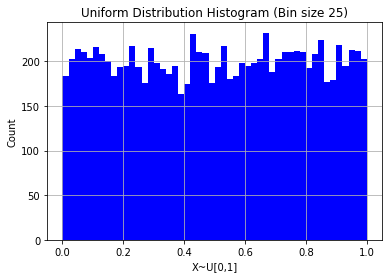

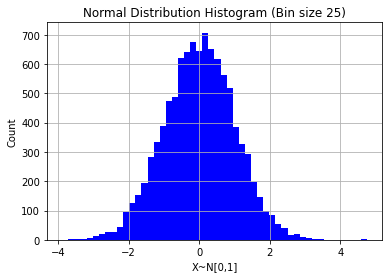

tensor([[4, 6, 1],
        [5, 8, 1],
        [1, 1, 1],
        [3, 9, 9]]) 

tensor([3, 6, 5, 7, 2, 1, 4, 0]) 

tensor([3, 6, 5, 7, 2, 1, 4, 0]) 

tensor([3, 6, 5, 7, 2, 1, 4, 0]) 



In [ ]:
#uniform[0,1] random tensor

rand1d = torch.rand(10000) 
plt.hist(rand1d, 50, color='b') 
plt.xlabel('X~U[0,1]') 
plt.ylabel('Count') 
plt.title("Uniform Distribution Histogram (Bin size 25)") 
plt.grid(True)
plt.show()

#N~(0,1) random tensor

rand1d = torch.randn(10000) 
plt.hist(rand1d, 50, color='b') 
plt.xlabel('X~N[0,1]') 
plt.ylabel('Count') 
plt.title("Normal Distribution Histogram (Bin size 25)") 
plt.grid(True)
plt.show()


randint2d = torch.randint(10, (4,3)) 
print(randint2d,'\n')

# modify seed

for i in range(3):
  torch.manual_seed(8) 
  randp = torch.randperm(8) 
  print(randp,'\n')

In [ ]:
#torch.add(), torch.matmul(), torch.mv(), torch.bmm() ,torch.mm()   matrix mul

#torch.mul()  element to element mul 

# Gradient

In [ ]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


In [ ]:
#Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3,2)
print ('w: ', linear.weight)
print ('b: ', linear.bias,'\n\n')

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item(),'\n')

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item(),'\n')

w:  Parameter containing:
tensor([[ 0.2461,  0.3023,  0.3376],
        [ 0.1729, -0.3057,  0.5133]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.1102, -0.0790], requires_grad=True) 


loss:  1.2824056148529053 

dL/dw:  tensor([[ 0.6751, -0.0036,  0.2493],
        [ 0.3855,  0.0469,  0.4317]])
dL/db:  tensor([-0.2365, -0.4646])
loss after 1 step optimization:  1.27118718624115 



In [ ]:
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])

# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()

print(type(x), type(y), type(z))

<class 'numpy.ndarray'> <class 'torch.Tensor'> <class 'numpy.ndarray'>
